In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import re

In [2]:
# font options
font = {
   #'family' : 'normal',
   #'weight' : 'bold',
   'size'   : 22
}
plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# save directory
ex = "ex1a"
if not os.path.isdir("../docs/{0}".format(ex)):
    os.mkdir("../docs/{0}".format(ex))

# Results directory
PATH = "../experiments/temp"

def set_errbar_alpha(lines, alpha):
    for line in lines:
        for bar in line[2]:
            bar.set_alpha(alpha)
        for bar in line[1]:
            bar.set_alpha(alpha)
    return lines

In [3]:
res1 = np.load(PATH+"/Ex1_100_MS_Lin_MultiSel_30_50.npy",allow_pickle=True).item()
res2 = np.load(PATH+"/Ex1_100_MS_Lin_PolySel_30_50.npy",allow_pickle=True).item()
res3 = np.load(PATH+"/Ex1_100_MS_Inc_MultiSel_30_50.npy",allow_pickle=True).item()
res4 = np.load(PATH+"/Ex1_100_MS_Inc_PolySel_30_50.npy",allow_pickle=True).item()
# ex = "ex4"
# if not os.path.isdir("../docs/{0}".format(ex)):
#     os.mkdir("../docs/{0}".format(ex))

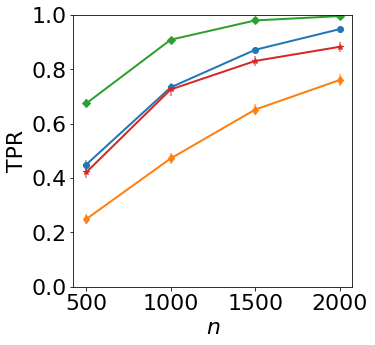

In [4]:
fig, ax= plt.subplots(figsize=(5,5))
labels = ["MultiMMD-Lin", "PolyMMD-Lin", "MultiMMD-Inc", "PolyMMD-Inc"]
l1 = ax.errorbar(res1['x_lin'],
                  [point['mean'] for point in res1['tpr']],
                  yerr=[point['sd'] for point in res1['tpr']],
                  marker='o',
                  label=labels[0])

l2 = ax.errorbar(res2['x_lin'], \
                  [point['mean'] for point in res2['tpr']], \
                  yerr=[point['sd'] for point in res2['tpr']], \
                  marker='d', label=labels[1])
l3 = ax.errorbar(res3['x_lin'], \
                  [point['mean'] for point in res3['tpr']], \
                  yerr=[point['sd'] for point in res3['tpr']], \
                  marker='D',label=labels[2])

l4 = ax.errorbar(res4['x_lin'], \
                  [point['mean'] for point in res4['tpr']], \
                  yerr=[point['sd'] for point in res4['tpr']], \
                  marker='*',label=labels[3])

lines = [l1, l2, l3, l4]

set_errbar_alpha(lines, 0.5)

ax.set_ylabel("TPR")
ax.set_xlabel("$n$")
ax.set_ylim(0,1)
#ax.legend()
fig.savefig("../docs/{0}/tpr.pdf".format(ex),bbox_inches='tight')

In [5]:
fig= plt.figure()
labels = ["MultiMMD-Lin", "PolyMMD-Lin", "MultiMMD-Inc", "PolyMMD-Inc"]
fig.legend(handles=[line[0] for line in lines], labels=labels, frameon=False, fontsize=22, ncol=1)
fig.savefig("../docs/{0}/vlegend.pdf".format(ex),bbox_inches='tight')
fig= plt.figure()
fig.legend(handles=lines, labels=labels, frameon=False, fontsize=22, ncol=len(labels))
fig.savefig("../docs/{0}/hlegend.pdf".format(ex),bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

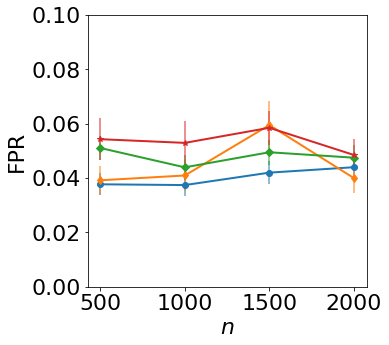

In [6]:
fig, ax= plt.subplots(figsize=(5,5))
l1 = ax.errorbar(res1['x_lin'],
                  [point['mean'] for point in res1['fpr']],
                  yerr=[point['sd'] for point in res1['fpr']],
                  marker='o',
                  label=labels[0])

l2 = ax.errorbar(res2['x_lin'], \
                  [point['mean'] for point in res2['fpr']], \
                  yerr=[point['sd'] for point in res2['fpr']], \
                  marker='d', label=labels[1])
l3 = ax.errorbar(res3['x_lin'], \
                  [point['mean'] for point in res3['fpr']], \
                  yerr=[point['sd'] for point in res3['fpr']], \
                  marker='D',label=labels[2])

l4 = ax.errorbar(res4['x_lin'], \
                  [point['mean'] for point in res4['fpr']], \
                  yerr=[point['sd'] for point in res4['fpr']], \
                  marker='*',label=labels[3])

lines = [l1, l2, l3, l4]

set_errbar_alpha(lines, 0.5)

ax.set_ylabel("FPR")
ax.set_xlabel("$n$")
ax.set_ylim(0,0.1)
fig.savefig("../docs/{0}/fpr.pdf".format(ex),bbox_inches='tight')


In [7]:
# PATH = "../experiments/temp"
# files = os.listdir(PATH)
# patt = re.compile('Ex5_100_Wine_(?!MultiSel)')
# results = list(filter(patt.match, files))
# for res in results:
#     print(res)
#     print(np.load(PATH+"/"+res,allow_pickle=True).item())